## Generación de Árboles Aleatorios (Random Forest)

Taller de Minería de Datos Avanzado

01/10/2023

Miguel Salinas González 20.215.515-4

Profesores: Max Chacón Pacheco, Felipe Bello Robles

In [1]:
#install.packages("ggfortify")
library(ggfortify)
#install.packages("ggplot2")
library(ggplot2)
#install.packages("ggpubr")
library(ggpubr)
#install.packages("FactoMineR")
library(FactoMineR)
#install.packages("corrplot")
library(corrplot)
#install.packages("factoextra")
library(factoextra)
#install.packages("tidyr")
library(tidyr)
#install.packages("dplyr")
library(dplyr)
#install.packages("leaps")
library(leaps)
#install.packages("cluster")
library(cluster)
#install.packages("NbClust")
library(NbClust)
#install.packages("MASS")
library(MASS)
#install.packages("rcompanion")
library(rcompanion)
#install.packages("fmsb")
library(fmsb)
#install.packages("naniar")
library(naniar)
#install.packages("readxl")
library(readxl)
#install.packages("randomForest")
require("randomForest")

Loading required package: ggplot2

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




## Carga de datos
A continuación se cargan y visualizan los datos del dataset Dry Beans

In [6]:
data <- read_excel(file.choose(), sheet = 1)
data$Class <- as.factor(data$Class)
tail(data)


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
42070,760.701,276.6917,193.9454,1.426647,0.7132163,42458,231.4415,0.7308133,0.9908616,0.9135964,0.8364602,0.006576935,0.001986023,0.6996656,0.9981761,DERMASON
42097,759.696,288.7216,185.9447,1.552728,0.7650022,42508,231.5158,0.7145743,0.9903312,0.9166031,0.8018652,0.006858484,0.001749094,0.6429877,0.9983852,DERMASON
42101,757.499,281.5764,190.7131,1.476439,0.7357022,42494,231.5268,0.7999430,0.9907516,0.9220153,0.8222522,0.006688116,0.001885835,0.6760986,0.9982187,DERMASON
42139,759.321,281.5399,191.1880,1.472582,0.7340648,42569,231.6313,0.7299324,0.9898988,0.9184241,0.8227297,0.006681220,0.001888271,0.6768842,0.9967673,DERMASON
42147,763.779,283.3826,190.2757,1.489326,0.7410548,42667,231.6532,0.7053891,0.9878126,0.9079065,0.8174575,0.006723673,0.001852025,0.6682367,0.9952224,DERMASON
42159,772.237,295.1427,182.2047,1.619841,0.7866930,42600,231.6862,0.7889625,0.9896479,0.8883804,0.7849972,0.007000705,0.001639812,0.6162206,0.9981796,DERMASON


## Visualizando los datos en Coordenadas Paralelas

In [7]:
# Instalación de paquetes necesarios para la visualización en coordenadas paralelas
#install.packages("MASS")
require("MASS")

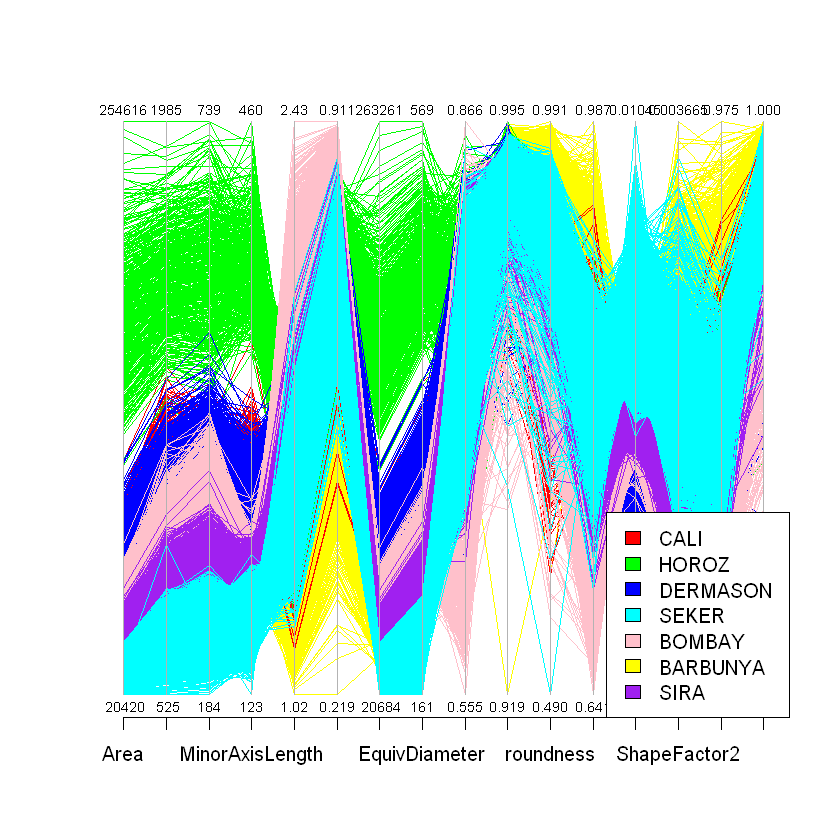

In [8]:
parcoord(data[,-17],var.label = TRUE,col=c("red", "green", "blue","cyan","pink","yellow","purple")[as.numeric(data$Class)])
legend("bottomright",legend = c("CALI", "HOROZ", "DERMASON", "SEKER", "BOMBAY", "BARBUNYA", "SIRA"),fill=c("red", "green", "blue","cyan","pink","yellow","purple"))

Intentando graficar en Coordenada paralelas con una muestra para una mejor interpretración

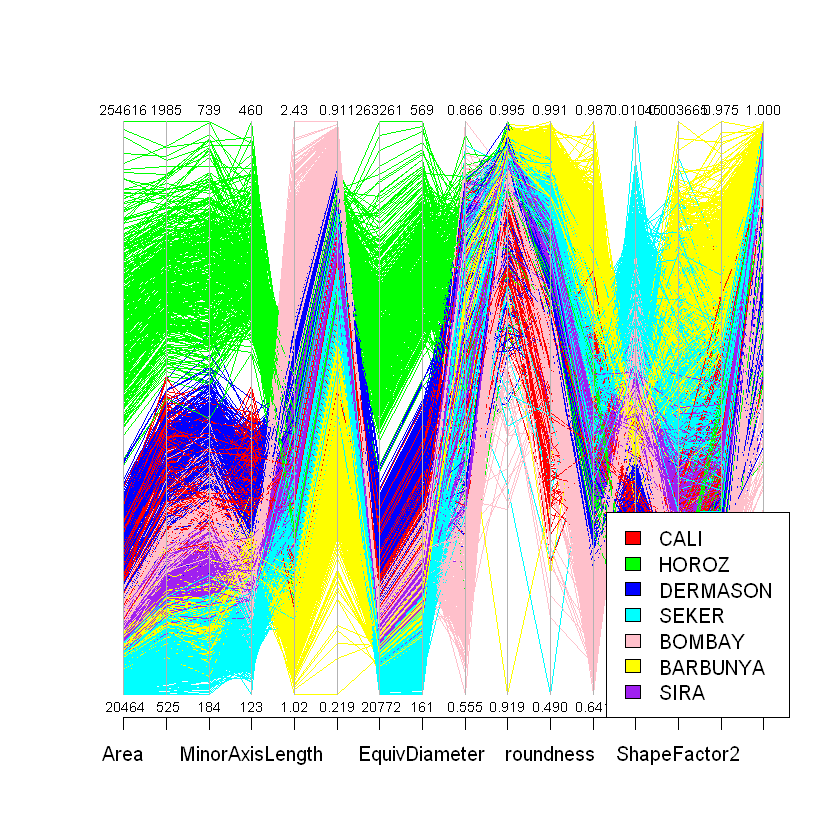

In [9]:
set.seed(202155154)
muestra <- sample_n(data, size = 10000, replace = FALSE)

parcoord(muestra[,-17],var.label = TRUE,col=c("red", "green", "blue","cyan","pink","yellow","purple")[as.numeric(muestra$Class)])
legend("bottomright",legend = c("CALI", "HOROZ", "DERMASON", "SEKER", "BOMBAY", "BARBUNYA", "SIRA"),fill=c("red", "green", "blue","cyan","pink","yellow","purple"))

## Aplicando inicialmente RandomForest

Se aplica RandomForest .

In [6]:
data.rf <- randomForest(Class ~., data=data, importance=TRUE, proximity=TRUE)
print(data.rf)


Call:
 randomForest(formula = Class ~ ., data = data, importance = TRUE,      proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 7.53%
Confusion matrix:
         BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA class.error
BARBUNYA     1204      1   72        0     8    11   26 0.089258699
BOMBAY          1    521    0        0     0     0    0 0.001915709
CALI           55      0 1527        0    32     3   13 0.063190184
DERMASON        0      0    0     3298     4    53  191 0.069937958
HOROZ           7      0   30       13  1831     0   47 0.050311203
SEKER           8      0    0       47     0  1924   48 0.050814011
SIRA            9      0    5      260    39    42 2281 0.134673748


## Importancia de cada atributo sobre las instancias de la clase.



,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,MeanDecreaseAccuracy,MeanDecreaseGini
Area,15.70,16.43,20.64,19.89,12.99,11.52,24.13,29.95,684.63
Perimeter,27.89,18.54,20.46,24.53,15.00,14.72,37.60,37.71,1075.90
MajorAxisLength,17.53,15.99,24.48,19.43,15.17,15.97,21.31,27.07,760.15
MinorAxisLength,14.90,16.55,22.15,22.93,21.42,20.42,23.18,41.24,862.34
AspectRation,17.67,6.82,15.41,17.64,17.80,19.03,26.21,36.62,752.53
Eccentricity,16.14,5.63,15.61,18.19,16.52,18.91,25.08,37.01,663.39
ConvexArea,18.69,17.55,21.27,21.77,14.38,12.70,26.68,32.01,844.41
EquivDiameter,15.36,16.61,20.98,20.05,13.13,11.14,24.43,32.31,671.75
Extent,6.60,-2.25,12.70,11.88,9.36,11.55,11.92,23.13,129.11
Solidity,31.13,1.68,23.96,32.99,14.77,16.90,21.41,53.73,206.55


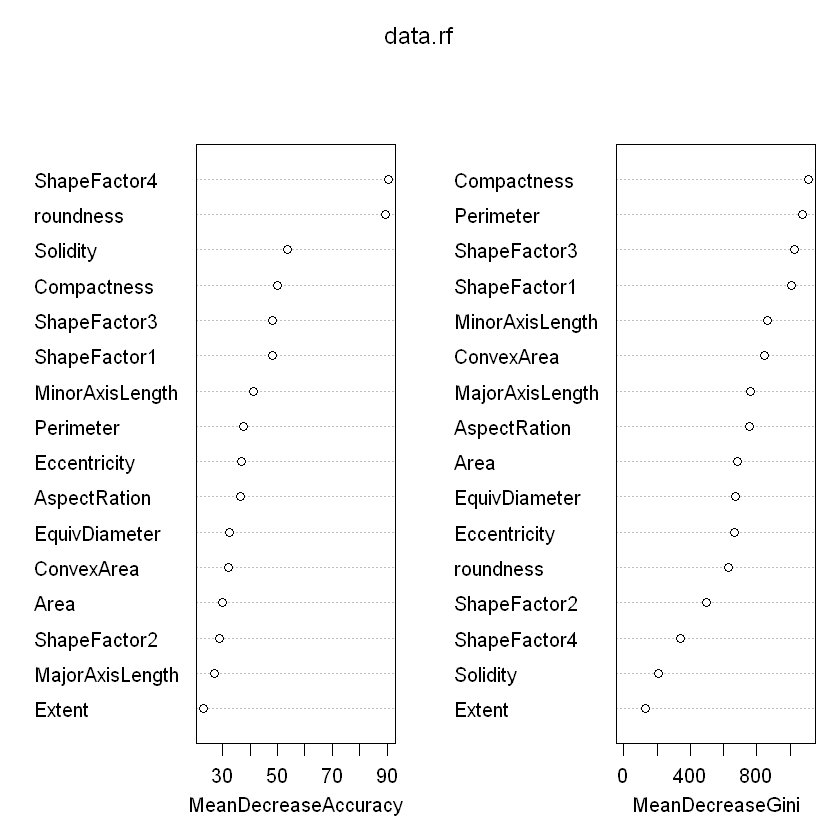

In [7]:
round(importance(data.rf), 2)
varImpPlot(data.rf)

### Número de árboles a generar.

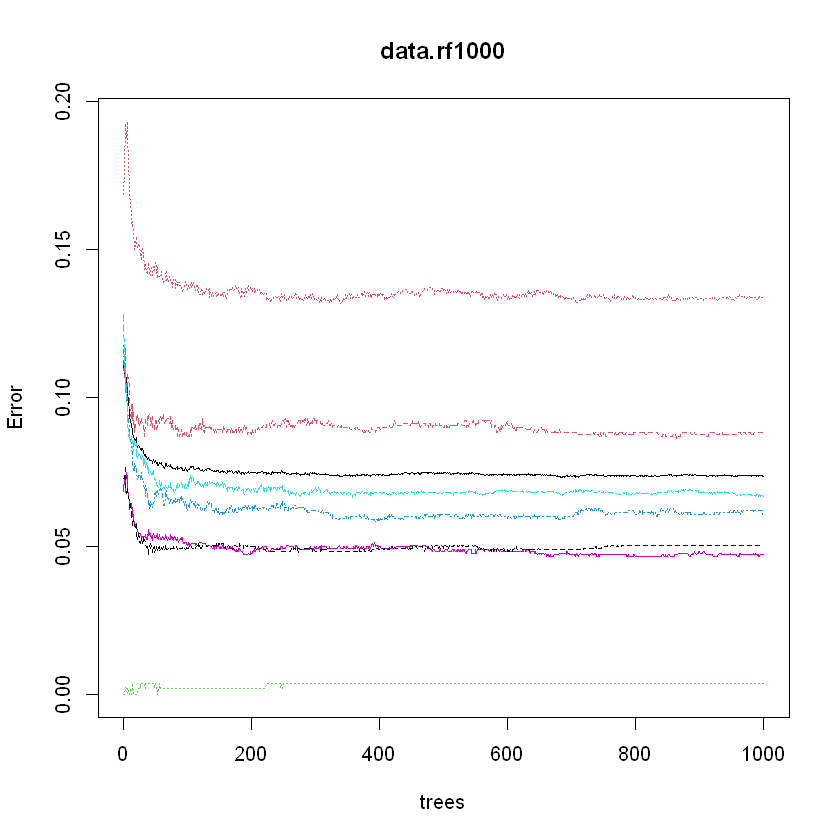

In [14]:
data.rf1000 <- randomForest(Class ~ ., data=data, ntree=1000, importance=TRUE,
proximity=TRUE )
plot(data.rf1000)

## Número de variables a escoger en el sub-espacio aleatorio de cada nodo.
La teoría indica que se deben escoger sqrt(n), para efectos práticos se compararán los resultados obtenidos con sqrt(n), sqrt(n)-1 y sqrt(n)+1


In [13]:
data.rf100n4 <- randomForest(Class ~ ., data=data, ntree=200, mtry=4,
importance=TRUE, proximity=TRUE )
print(data.rf100n4)


Call:
 randomForest(formula = Class ~ ., data = data, ntree = 200, mtry = 4,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 4

        OOB estimate of  error rate: 7.47%
Confusion matrix:
         BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA class.error
BARBUNYA     1201      1   69        0     9    12   30 0.091527988
BOMBAY          1    521    0        0     0     0    0 0.001915709
CALI           51      0 1533        0    31     4   11 0.059509202
DERMASON        0      0    0     3303     5    52  186 0.068527919
HOROZ           6      0   31       13  1834     0   44 0.048755187
SEKER           7      0    0       48     0  1926   46 0.049827331
SIRA            8      0    6      271    38    37 2276 0.136570561


In [18]:
data.rf100n2 <- randomForest(Class ~ ., data=data, ntree=200, mtry=2,
importance=TRUE, proximity=TRUE)
print(data.rf100n2)


Call:
 randomForest(formula = Class ~ ., data = data, ntree = 200, mtry = 2,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 7.69%
Confusion matrix:
         BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA class.error
BARBUNYA     1189      1   80        0    10    12   30 0.100605144
BOMBAY          1    521    0        0     0     0    0 0.001915709
CALI           58      0 1524        0    31     4   13 0.065030675
DERMASON        0      0    0     3297     6    55  188 0.070219966
HOROZ           8      0   26       12  1829     0   53 0.051348548
SEKER           7      0    0       46     0  1924   50 0.050814011
SIRA           10      0    4      267    37    38 2280 0.135053111


In [9]:
data.rf100n3 <- randomForest(Class ~ ., data=data, ntree=200, mtry=3,
importance=TRUE, proximity=TRUE)
print(data.rf100n3)


Call:
 randomForest(formula = Class ~ ., data = data, ntree = 200, mtry = 3,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 7.6%
Confusion matrix:
         BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA class.error
BARBUNYA     1198      1   73        1     9    11   29 0.093797277
BOMBAY          2    520    0        0     0     0    0 0.003831418
CALI           55      0 1528        0    31     3   13 0.062576687
DERMASON        0      0    0     3294     5    51  196 0.071065990
HOROZ           6      0   30       13  1831     0   48 0.050311203
SEKER           7      0    1       47     0  1920   52 0.052787370
SIRA           10      0    4      259    35    42 2286 0.132776935


In [16]:
data.rf100n5 <- randomForest(Class ~ ., data=data, ntree=200, mtry=5,
importance=TRUE, proximity=TRUE)
print(data.rf100n5)


Call:
 randomForest(formula = Class ~ ., data = data, ntree = 200, mtry = 5,      importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 5

        OOB estimate of  error rate: 7.53%
Confusion matrix:
         BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA class.error
BARBUNYA     1201      1   70        1    10    13   26 0.091527988
BOMBAY          1    521    0        0     0     0    0 0.001915709
CALI           50      0 1531        0    34     4   11 0.060736196
DERMASON        0      0    0     3297     4    57  188 0.070219966
HOROZ           7      0   30       13  1837     0   41 0.047199170
SEKER           6      0    1       45     0  1933   42 0.046373952
SIRA           12      0    5      274    41    38 2266 0.140364188


## Importancia de las clases en el modelo con menor error

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA,MeanDecreaseAccuracy,MeanDecreaseGini
Area,6.34,8.33,8.66,8.84,5.92,5.73,10.24,14.74,585.57
Perimeter,13.81,10.63,10.54,11.31,6.25,7.56,18.98,17.62,1248.08
MajorAxisLength,7.48,7.03,11.52,8.31,6.04,7.49,10.64,12.71,745.36
MinorAxisLength,6.51,7.34,9.86,9.50,9.56,10.32,11.55,16.64,910.39
AspectRation,6.85,2.40,6.93,8.72,7.43,8.05,11.09,15.81,602.93
Eccentricity,8.40,2.49,7.17,9.81,8.22,8.77,11.72,15.64,792.59
ConvexArea,10.13,7.47,9.38,10.87,6.59,5.56,12.55,15.83,807.67
EquivDiameter,8.04,7.81,10.79,9.53,6.95,5.10,10.95,14.65,706.04
Extent,1.37,0.00,7.05,5.30,4.59,4.78,6.86,8.98,130.07
Solidity,13.79,1.76,11.11,12.58,10.66,5.27,8.44,19.26,198.89


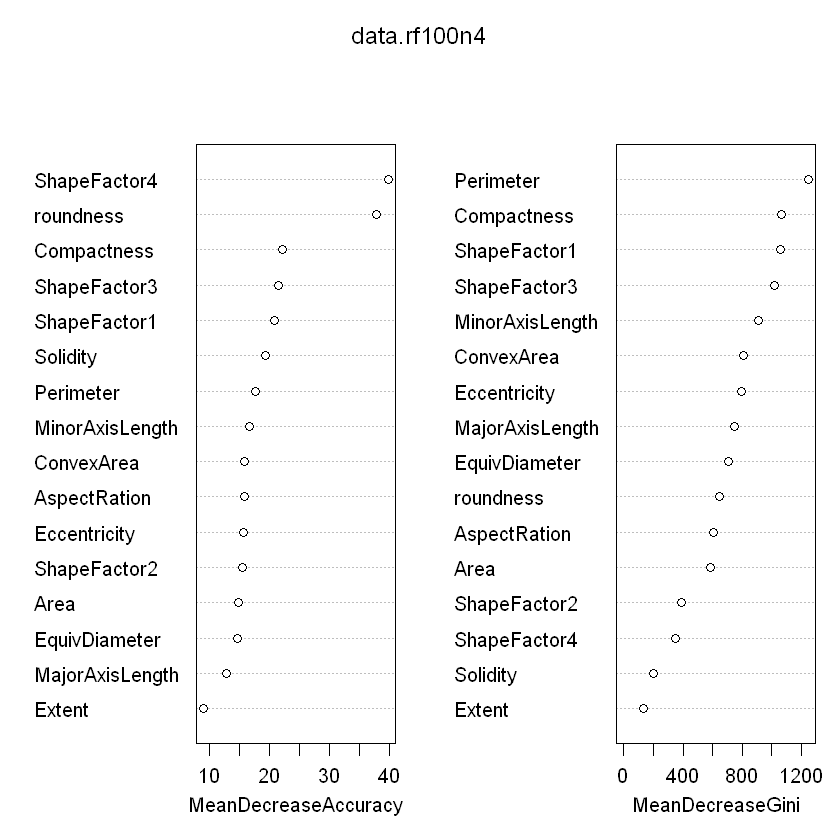

In [11]:
round(importance(data.rf100n4), 2)
varImpPlot(data.rf100n4)

## Proximidad del RF con menor OOB

In [7]:
data.mds <- cmdscale(1 - data.rf100n4$proximity, eig=TRUE)
op <- par(pty="s")
pairs(cbind(data[,-17], data.mds$points), cex=0.6, gap=0,
col=c("red", "green", "blue","cyan","pink","yellow","purple")[as.numeric(data$Class)],
main="Dry Beans Data: Predictors and MDS of Proximity Based on RandomForest")
par(op)

: 

## Construcción de un árbol de decisión como marco de referencia

In [15]:
install.packages("rpart")
install.packages("rpart.plot")  # Para visualizar el árbol
install.packages("caret")
library(caret)
library(rpart)
library(rpart.plot)

Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Miguel - PC\AppData\Local\Temp\RtmpkjL9SB\downloaded_packages


Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Miguel - PC\AppData\Local\Temp\RtmpkjL9SB\downloaded_packages


Installing package into 'C:/Users/Miguel - PC/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'prodlim', 'timechange', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'lubridate', 'timeDate', 'foreach', 'ModelMetrics', 'pROC', 'recipes'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'timechange' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' suc

Loading required package: lattice

Registered S3 methods overwritten by 'pROC':
  method    from
  print.roc fmsb
  plot.roc  fmsb



Warning message:
"All boxes will be white (the box.palette argument will be ignored) because
the number of classes in the response 7 is greater than length(box.palette) 6.
To silence this warning use box.palette=0 or trace=-1."


          predictions
           BARBUNYA BOMBAY CALI DERMASON HOROZ SEKER SIRA
  BARBUNYA      240      0   24        0     2     0    9
  BOMBAY          0     96    0        0     0     0    0
  CALI           29      0  267        0    22     0    2
  DERMASON        0      0    0      658     1    14   46
  HOROZ           6      0   12        2   348     0   17
  SEKER           1      0    0       22     0   346   22
  SIRA            3      0    3       64     0    32  435

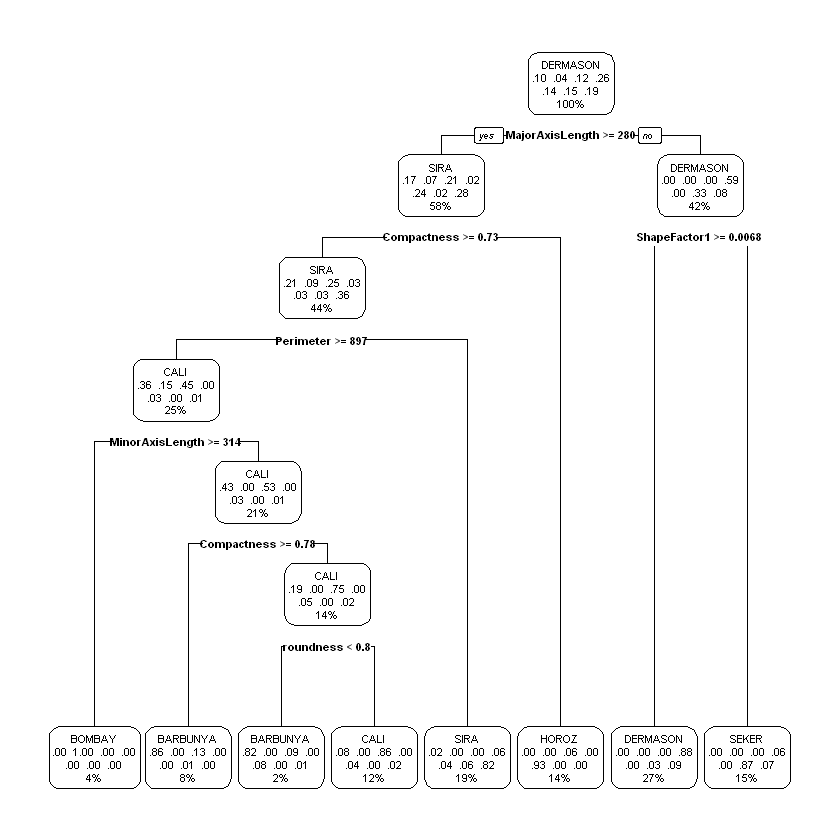

In [16]:
set.seed(123)
indices <- sample(1:nrow(data), nrow(data)*0.8)  
train_data <- data[indices, ]
test_data <- data[-indices, ]

tree_model <- rpart(Class ~ ., data = train_data, method = "class")
rpart.plot(tree_model)
predictions <- predict(tree_model, newdata = test_data, type = "class")
table(test_data$Class, predictions)